In [89]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt


In [90]:
df= pd.read_csv(r"D:\Projects\My_Estate_Project\data\raw\gurgaon_properties_cleaned_v2.csv")
df.head()

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,ss the leaf,sector 85,1.25,10888.0,1148.0,Super Built up area 1741(161.74 sq.m.)Carpet a...,2,2,3+,...,1741.0,NaN,1148.00,0,0,1,0,0,0,156.0
1,flat,chd avenue,sector 71,1.40,7945.0,1762.0,Carpet area: 1762 (163.7 sq.m.),3,3,2,...,NaN,NaN,1762.00,0,0,0,1,0,1,125.0
2,flat,smart world orchard,sector 61,1.47,12782.0,1150.0,Carpet area: 1150 (106.84 sq.m.),2,2,2,...,NaN,NaN,1150.00,1,0,0,1,0,0,53.0
3,flat,tarc maceo,sector 91,0.89,6339.0,1404.0,Super Built up area 1404(130.44 sq.m.)Carpet a...,2,2,3+,...,1404.0,NaN,1200.00,0,0,0,0,1,1,13.0
4,flat,emaar gurgaon greens,sector 102,1.60,9696.0,1650.0,Super Built up area 1650(153.29 sq.m.)Carpet a...,3,3,3,...,1650.0,NaN,1022.58,0,0,0,0,0,0,46.0


In [91]:
df.shape

(3681, 23)

In [92]:
df.duplicated().sum()

0

In [93]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    17
Price_per_sqft           17
area                     17
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 19
facing                 1048
agePossession             0
super_built_up_area    1805
built_up_area          1989
carpet_area            1807
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score            115
dtype: int64

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3681 entries, 0 to 3680
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3681 non-null   object 
 1   society              3680 non-null   object 
 2   sector               3681 non-null   object 
 3   price                3664 non-null   float64
 4   Price_per_sqft       3664 non-null   float64
 5   area                 3664 non-null   float64
 6   areaWithType         3681 non-null   object 
 7   bedRoom              3681 non-null   int64  
 8   bathroom             3681 non-null   int64  
 9   balcony              3681 non-null   object 
 10  floorNum             3662 non-null   float64
 11  facing               2633 non-null   object 
 12  agePossession        3681 non-null   object 
 13  super_built_up_area  1876 non-null   float64
 14  built_up_area        1692 non-null   float64
 15  carpet_area          1874 non-null   f

### property_type

In [95]:
df["property_type"].value_counts()

property_type
flat     2822
house     859
Name: count, dtype: int64

<Axes: xlabel='property_type'>

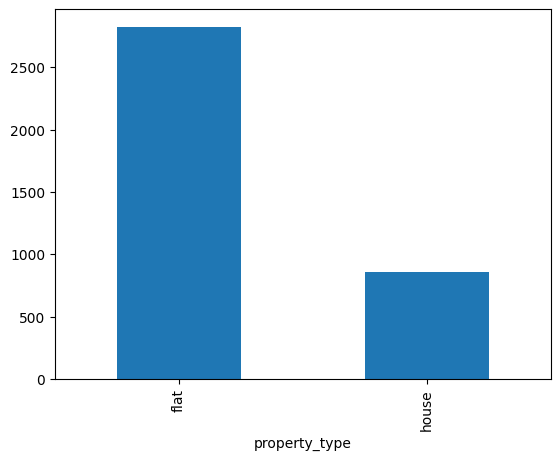

In [96]:
df["property_type"].value_counts().plot(kind="bar")

In [97]:
df["property_type"].isnull().sum()

0

#### Observations

- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [98]:
df["society"].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
chanderlok society                        1
radhakrishna society                      1
essel tower                               1
ashok vihar phase 3 gurgaon               1
pyramid pride                             1
Name: count, Length: 676, dtype: int64

In [99]:
df["society"].value_counts(normalize=True).cumsum()

society
independent                             0.132065
tulip violet                            0.152446
ss the leaf                             0.172283
shapoorji pallonji joyville gurugram    0.183696
dlf new town heights                    0.195109
                                          ...   
chanderlok society                      0.998913
radhakrishna society                    0.999185
essel tower                             0.999457
ashok vihar phase 3 gurgaon             0.999728
pyramid pride                           1.000000
Name: proportion, Length: 676, dtype: float64

In [100]:
df[df["society"]!= "independent"]  ["society"].value_counts(normalize=True).cumsum().head(77)

society
tulip violet                            0.023482
ss the leaf                             0.046337
shapoorji pallonji joyville gurugram    0.059487
dlf new town heights                    0.072636
signature global park                   0.083594
                                          ...   
dlf the primus                          0.498435
umang monsoon breeze                    0.502505
unitech uniworld resorts                0.506262
mvn athens                              0.510019
ireo the corridors                      0.513776
Name: proportion, Length: 77, dtype: float64

In [101]:
# Frequency Distribution for Society

society_counts= df["society"].value_counts()

frequency_bins={
    " (>100) Very High": (society_counts>100).sum(),
    " (50-100) High": ((society_counts>=50) & (society_counts<=100)).sum(),
    " (10-49) Average ": ((society_counts>=10) & (society_counts<50)).sum(),
    " (2-9) Low": ((society_counts>=2) & (society_counts<9)).sum(),
    " (1) Very Low": (society_counts<2).sum()
}
frequency_bins

{' (>100) Very High': 1,
 ' (50-100) High': 2,
 ' (10-49) Average ': 92,
 ' (2-9) Low': 264,
 ' (1) Very Low': 308}

<Axes: xlabel='society'>

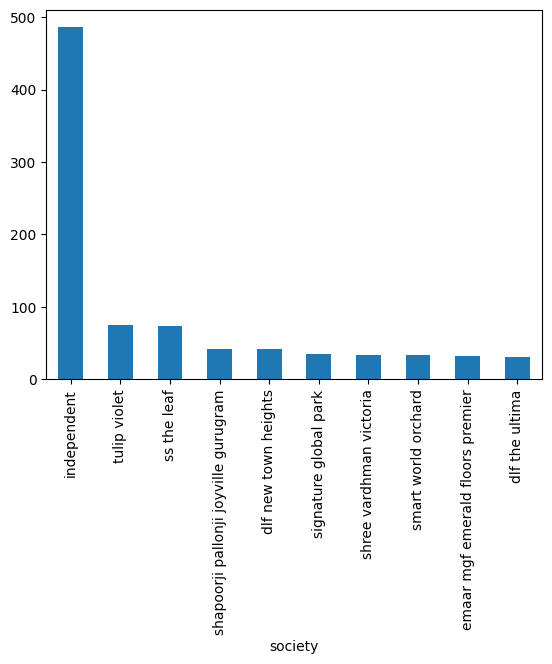

In [102]:
# top 10 socities
df["society"].value_counts().head(10).plot(kind="bar")

<Axes: xlabel='society'>

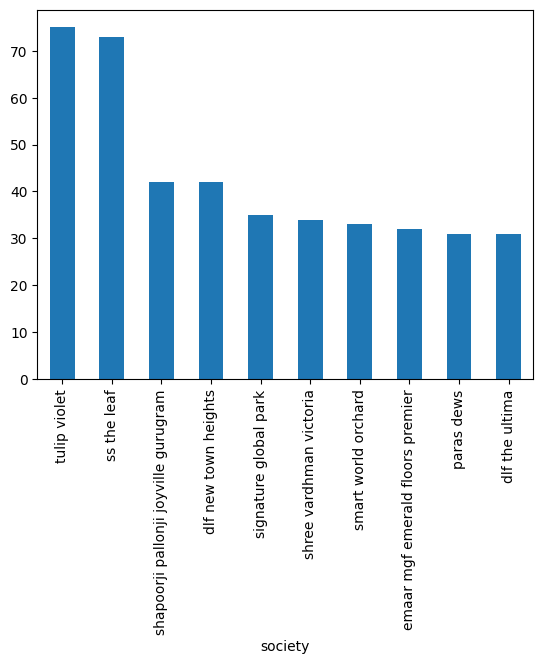

In [103]:
df[df["society"]!= "independent"]["society"].value_counts().head(10).plot(kind="bar")

In [104]:
df["society"].isnull().sum()

1

In [105]:
df[df["society"].isnull()]

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2841,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,157.0


#### Observations

- Around 13% properties comes under independent tag.
- There are 725 societies. 
- The top 77 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 277 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [106]:
df["sector"].value_counts()

sector
sohna road    154
sector 85     108
sector 102    107
sector 92     100
sector 69      93
             ... 
sector 17b      3
sector 88b      3
sector 17a      3
sector 27       3
sector 37       1
Name: count, Length: 113, dtype: int64

In [107]:
df["sector"].value_counts().shape

(113,)

<Axes: xlabel='sector'>

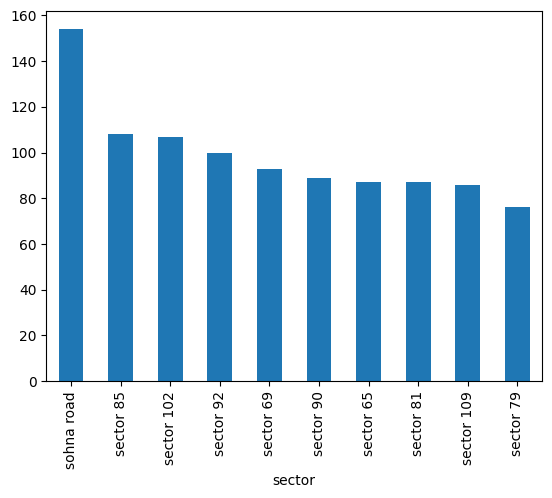

In [108]:
df["sector"].value_counts().head(10).plot(kind="bar")

In [109]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    " (>100) Very High ": (sector_counts > 100).sum(),
    " (50-100) High ": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    " (10-49) Average ": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    " (2-9) Low ": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    " (1) Very Low ": (sector_counts == 1).sum()
}

sector_frequency_bins

{' (>100) Very High ': 3,
 ' (50-100) High ': 25,
 ' (10-49) Average ': 63,
 ' (2-9) Low ': 21,
 ' (1) Very Low ': 1}

#### Observations

- There are a total of 234 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 59 sectors have between 2 to 9 listings.
    - Very Low (1): .

### Price

In [112]:
df["price"].isnull().sum()

17

In [113]:
df["price"].describe()

count    3664.000000
mean        2.533248
std         2.979058
min         0.070000
25%         0.950000
50%         1.525000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

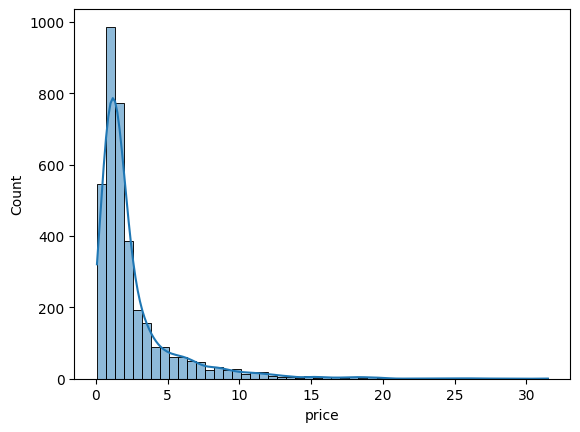

In [120]:
sns.histplot(df["price"], kde=True, bins=50)

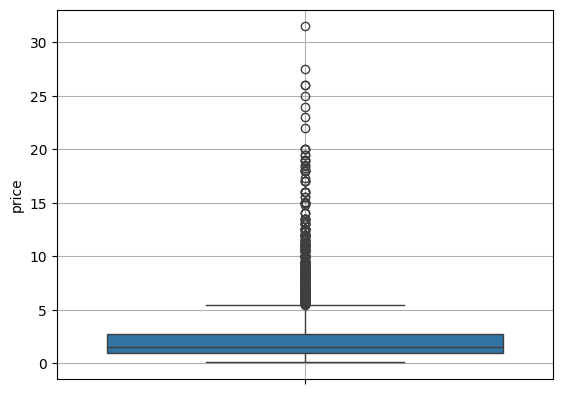

In [122]:
sns.boxplot(df["price"])
plt.grid()

In [124]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)

3.281159259029438 14.95329398708748


- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.



**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [128]:
df["price"].quantile( [0.01, 0.05, 0.10, 0.50, 0.95, 0.99] )

0.01     0.250
0.05     0.370
0.10     0.500
0.50     1.525
0.95     8.500
0.99    15.248
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 10% Quantile: Only 1% of properties are priced below 0.50 crores.
- 50% Quantile: 5% of properties are priced below 1.52 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.25 crores, indicating that very few properties are priced above this value.

In [129]:
# Identify potential outliers using IQR method

q1=df["price"].describe()["25%"]
q3=df["price"].describe()["75%"]

IQR= q3-q1

IQR

1.8

In [130]:
lower_bound = q1 - 1.5 * IQR
upper_bound = q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [134]:
outliers= df[(df["price"] < lower_bound) | (df["price"] > upper_bound)]
outliers

,property_type,society,sector,price,Price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
6,house,independent,sector 26,8.49,47167.0,1800.0,Plot area 200(167.23 sq.m.),12,12,3+,...,NaN,1800.0,NaN,0,1,0,1,0,1,42.0
24,house,independent,sector 25,7.30,1560.0,46795.0,Plot area 215(179.77 sq.m.)Built Up area: 5800...,9,9,2,...,NaN,5800.0,5200.0,0,1,1,0,0,1,109.0
101,house,independent,sector 41,7.00,28283.0,2475.0,Plot area 275(229.94 sq.m.),7,7,3+,...,NaN,2475.0,NaN,1,1,1,1,0,2,151.0
114,flat,tata primanti,sector 72,6.50,15294.0,4250.0,Super Built up area 4250(394.84 sq.m.),4,4,3+,...,4250.0,NaN,NaN,1,1,0,1,0,0,67.0
118,house,vipul tatvam villa,sector 48,7.80,23148.0,3370.0,Plot area 360(301.01 sq.m.),4,4,3+,...,NaN,3240.0,NaN,1,1,1,1,0,1,145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3647,house,independent,sector 25,11.00,35530.0,3096.0,Plot area 344(287.63 sq.m.),5,5,3+,...,NaN,3096.0,NaN,1,1,1,1,0,0,NaN
3661,house,dlf city plots phase 2,sector 25,6.50,36111.0,1800.0,Plot area 200(167.23 sq.m.),5,5,3+,...,NaN,1800.0,NaN,1,1,1,1,0,1,NaN
3662,flat,pioneer araya,sector 62,10.75,19500.0,5513.0,Super Built up area 5514(512.27 sq.m.),5,7,3,...,5514.0,NaN,NaN,0,1,0,0,0,1,NaN
3666,house,vipul tatvam villa,sector 48,8.50,26235.0,3240.0,Plot area 360(301.01 sq.m.),4,4,2,...,NaN,3240.0,NaN,0,1,1,1,0,0,NaN


In [135]:
outliers.shape

(425, 23)

In [137]:
outliers["price"].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

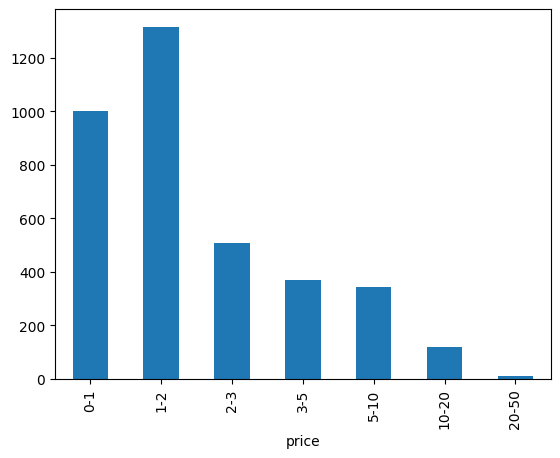

In [140]:
#price binning

bins=[0, 1, 2, 3, 5, 10, 20, 50]

bin_labels= ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]

pd.cut(df["price"], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind="bar")

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

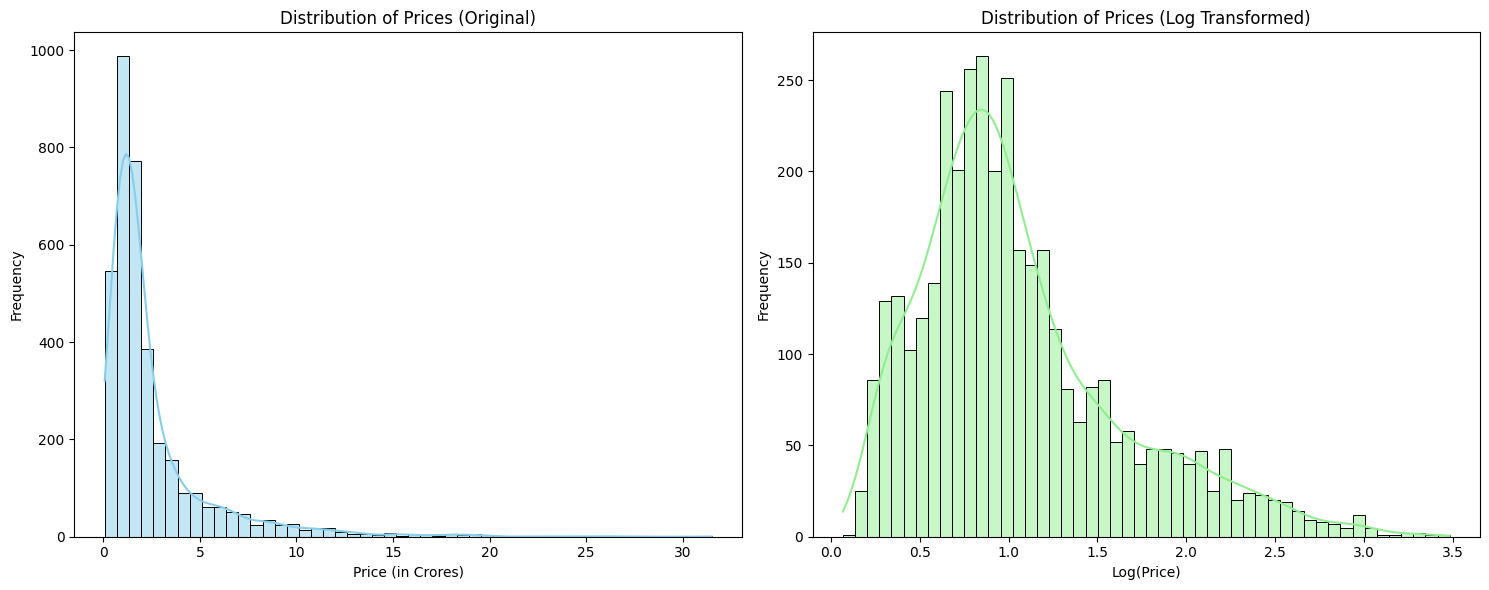

In [141]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

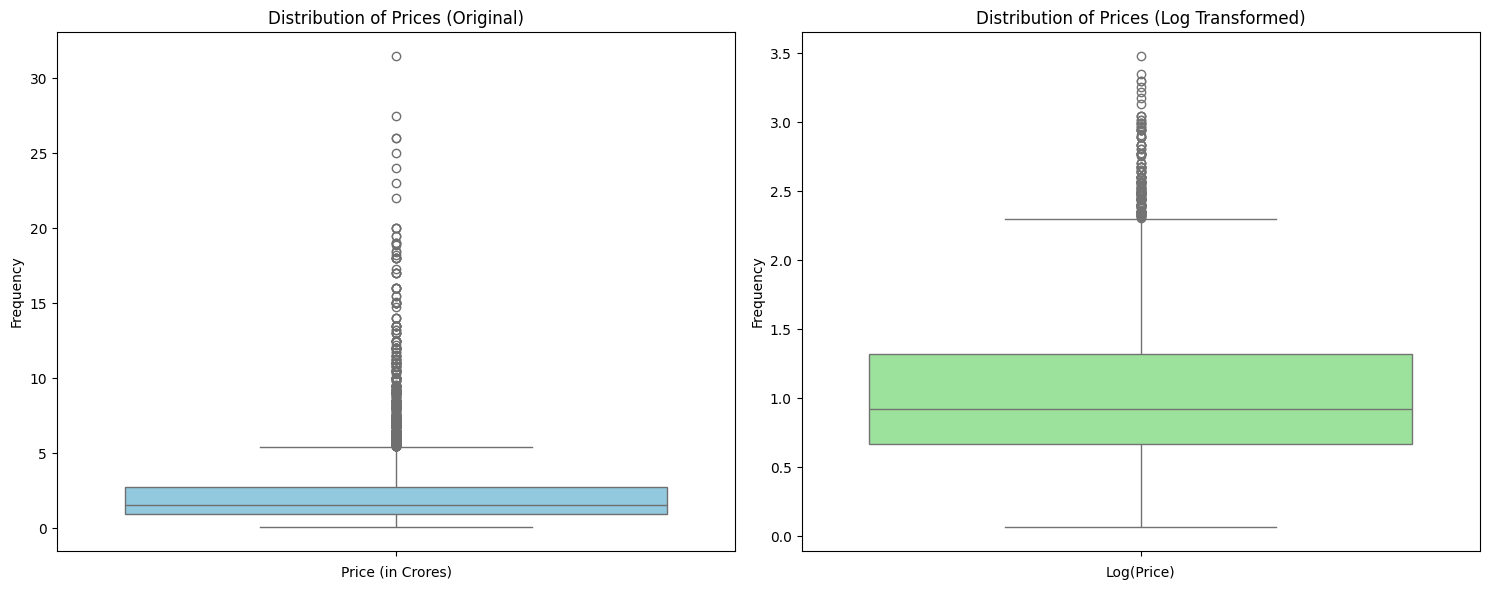

In [142]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [143]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740656509013653 0.9676010482364177


### Price per sqft

In [145]:
df["Price_per_sqft"].isnull().sum()

17

In [147]:
df["Price_per_sqft"].describe()

count      3664.000000
mean      13895.281114
std       23197.757961
min           4.000000
25%        6818.000000
50%        9022.000000
75%       13888.250000
max      600000.000000
Name: Price_per_sqft, dtype: float64

<Axes: xlabel='Price_per_sqft', ylabel='Count'>

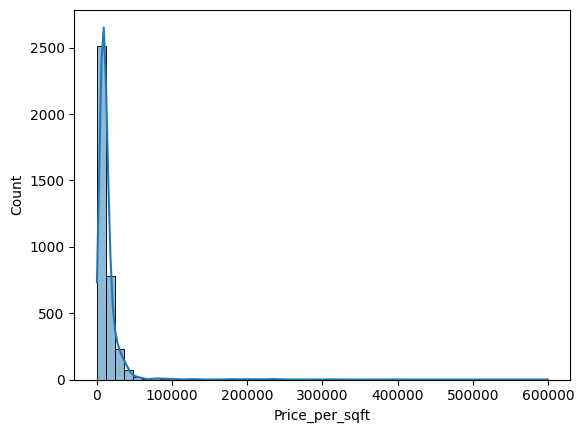

In [150]:
sns.histplot(df["Price_per_sqft"], bins=50, kde=True)

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='Price_per_sqft'>

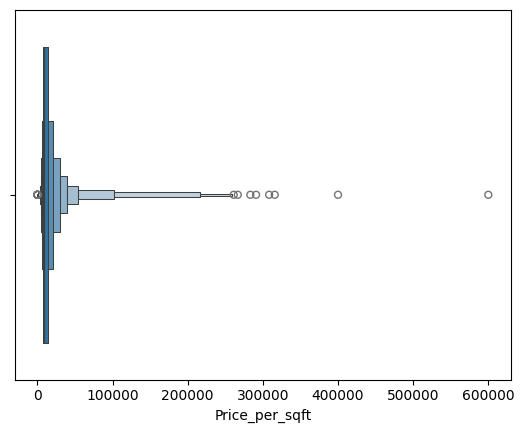

In [159]:
sns.boxenplot(x=df["Price_per_sqft"])


The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### Bedroom

In [161]:
df["bedRoom"].isnull().sum()

0

<Axes: ylabel='bedRoom'>

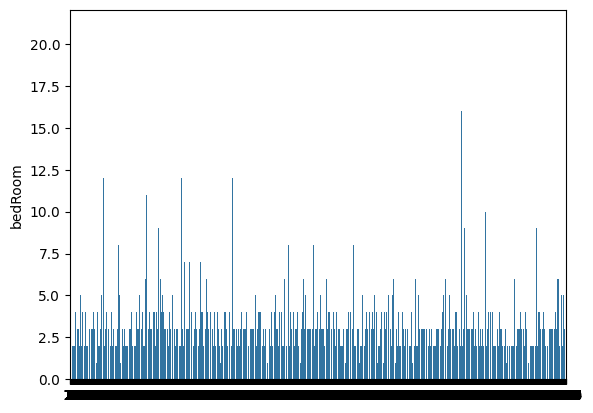

In [164]:
sns.barplot(df["bedRoom"])

<Axes: xlabel='bedRoom'>

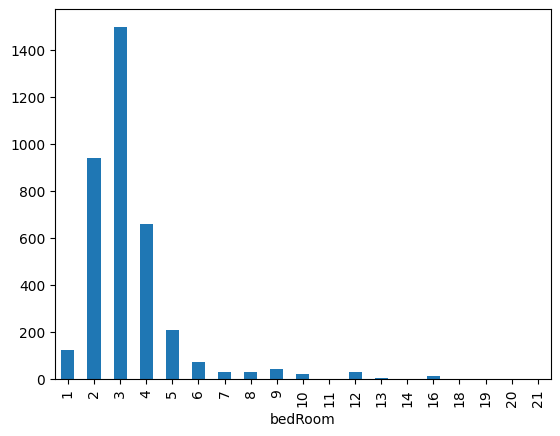

In [166]:
df["bedRoom"].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

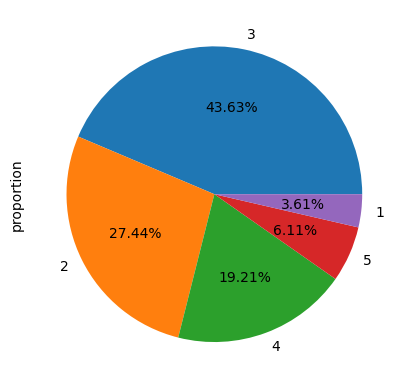

In [173]:
df["bedRoom"].value_counts(normalize=True).head().plot(kind="pie", autopct='%0.2f%%')

### BathRoom

In [174]:
df["bathroom"].isnull().sum()

0

In [175]:
df["bathroom"].value_counts()

bathroom
3     1080
2     1048
4      820
5      294
1      156
6      117
9       41
7       40
8       25
12      22
10       9
16       8
13       4
11       4
18       4
17       3
20       3
14       2
21       1
Name: count, dtype: int64

<Axes: xlabel='bathroom'>

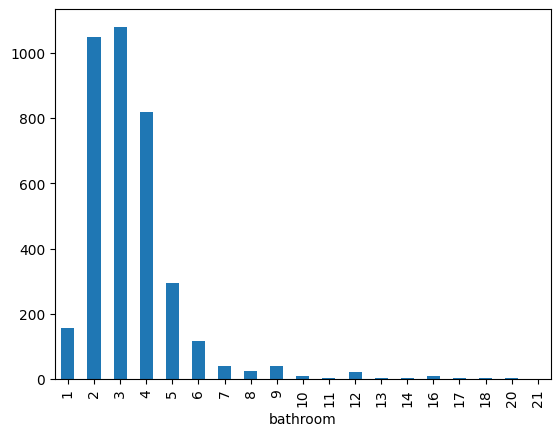

In [178]:
df["bathroom"].value_counts().sort_index().plot(kind="bar")

<Axes: ylabel='proportion'>

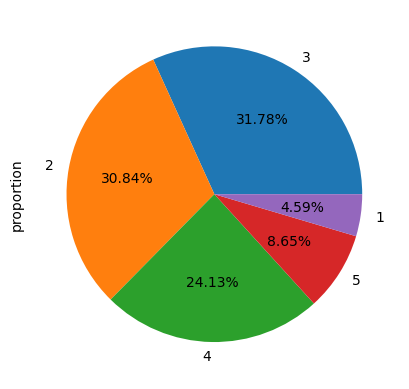

In [184]:
df["bathroom"].value_counts(normalize=True).head().plot(kind="pie", autopct='%0.2f%%')

### Balcony

In [180]:
df["balcony"].isnull().sum()

0

In [182]:
df["balcony"].value_counts()

balcony
3+    1172
3     1076
2      886
1      365
0      182
Name: count, dtype: int64

<Axes: xlabel='balcony'>

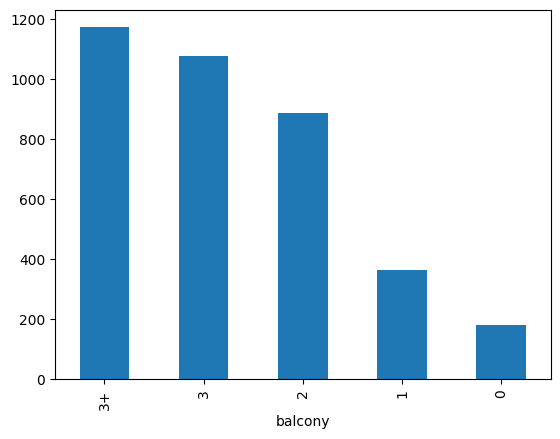

In [183]:
df["balcony"].value_counts().plot(kind="bar")

<Axes: ylabel='proportion'>

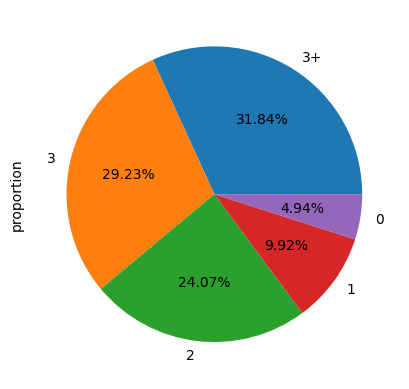

In [186]:
df["balcony"].value_counts(normalize=True).plot(kind="pie", autopct='%0.2f%%')

In [188]:
df.iloc[:, 10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,17.0,East,Relatively New,1741.0,NaN,1148.00,0,0,1,0,0,0,156.0
1,1.0,South-East,Moderately Old,NaN,NaN,1762.00,0,0,0,1,0,1,125.0
2,4.0,North-East,New Property,NaN,NaN,1150.00,1,0,0,1,0,0,53.0
3,9.0,East,Relatively New,1404.0,NaN,1200.00,0,0,0,0,1,1,13.0
4,8.0,NaN,Relatively New,1650.0,NaN,1022.58,0,0,0,0,0,0,46.0


### floorNum

In [190]:
df["floorNum"].isnull().sum()

19

In [191]:
df["floorNum"].describe()

count    3662.000000
mean        6.798471
std         6.016940
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

<Axes: xlabel='floorNum'>

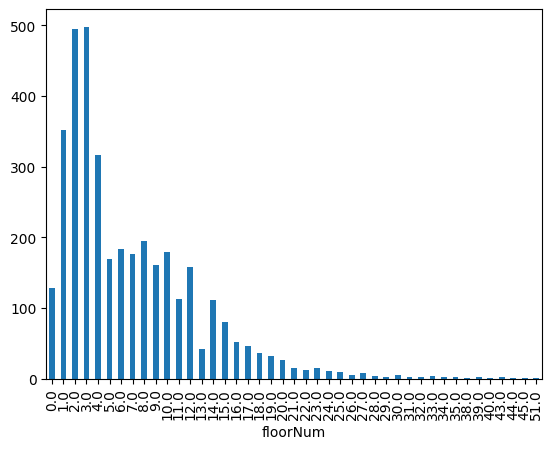

In [199]:
df["floorNum"].value_counts().sort_index().plot(kind="bar")

<Axes: xlabel='floorNum'>

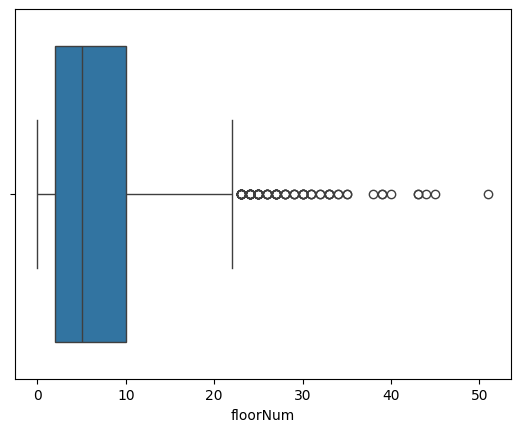

In [202]:
sns.boxplot(x=df["floorNum"])

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### Facing

In [204]:
df["facing"].value_counts()

facing
East          624
North-East    623
North         387
West          249
South         231
North-West    193
South-East    173
South-West    153
Name: count, dtype: int64

In [205]:
df["facing"].isnull().sum()

1048

In [206]:
df["facing"].fillna("NA", inplace=True)

In [207]:
df["facing"].value_counts()

facing
NA            1048
East           624
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### agePossession

In [208]:
df["agePossession"].value_counts()

agePossession
Relatively New        1646
New Property           594
Moderately Old         563
Undefined              448
Old Property           303
Under Construction     127
Name: count, dtype: int64

In [209]:
df["agePossession"].isnull().sum()

0

### Areas

#### Super built up area

In [211]:
df["super_built_up_area"].describe()

count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

In [212]:
df["super_built_up_area"].isnull().sum()

1805

<Axes: xlabel='super_built_up_area', ylabel='Count'>

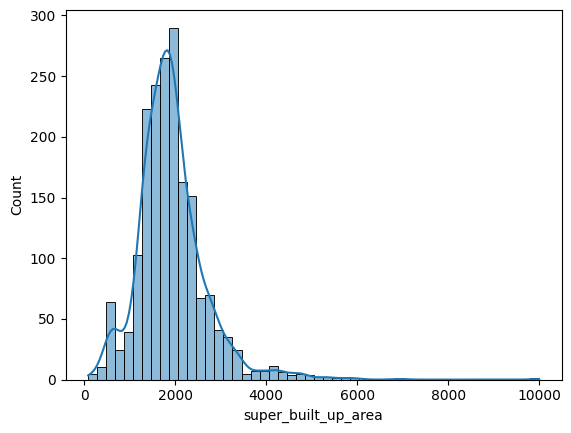

In [215]:
sns.histplot(df["super_built_up_area"].dropna(), kde=True, bins=50)

<Axes: xlabel='super_built_up_area'>

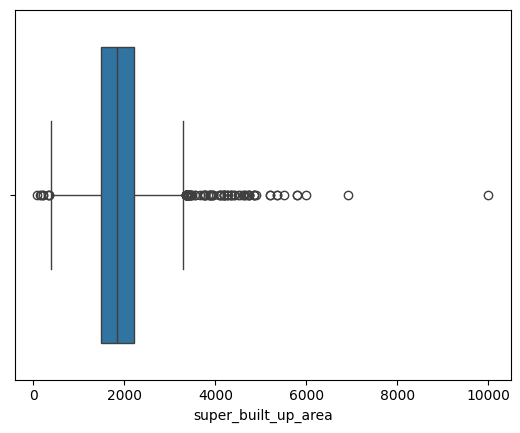

In [218]:
sns.boxplot(x=df["super_built_up_area"].dropna())

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [220]:
# built up area
df["built_up_area"].describe()

count      1692.000000
mean       2378.610537
std       17932.288899
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

In [221]:
df["built_up_area"].isnull().sum()

1989

<Axes: xlabel='built_up_area', ylabel='Count'>

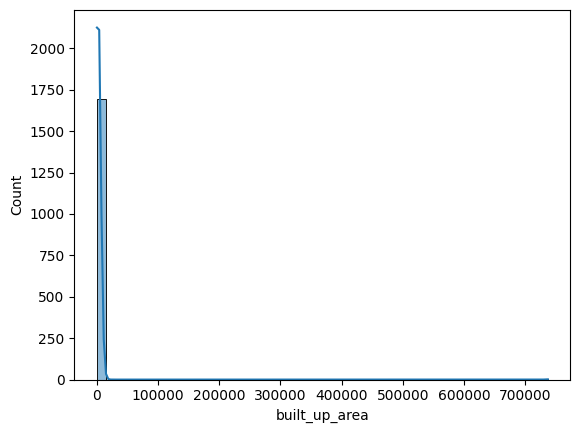

In [224]:
sns.histplot(df["built_up_area"].dropna(),  kde=True, bins=50)

<Axes: xlabel='built_up_area'>

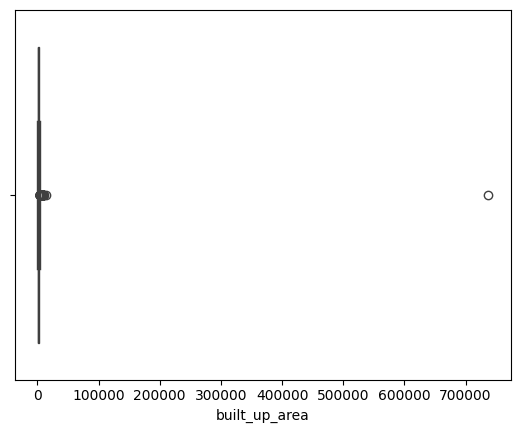

In [226]:
sns.boxplot(x=df["built_up_area"].dropna())

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [227]:
# carpet area
df["carpet_area"].describe()

count      1874.000000
mean       2528.352742
std       22787.674739
min          15.000000
25%         845.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

In [228]:
df["carpet_area"].isnull().sum()

1807

<Axes: xlabel='carpet_area', ylabel='Count'>

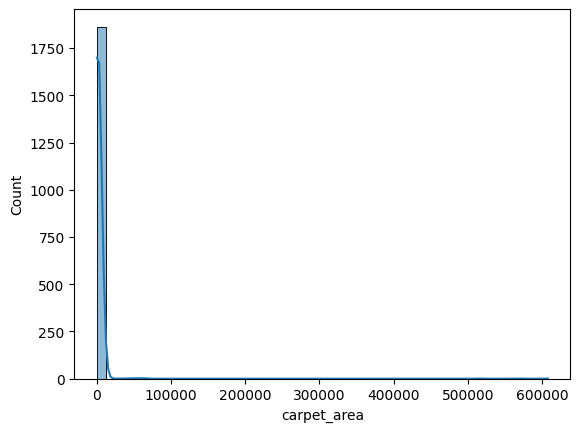

In [230]:
sns.histplot(df["carpet_area"].dropna(), kde=True, bins=50)

<Axes: xlabel='carpet_area'>

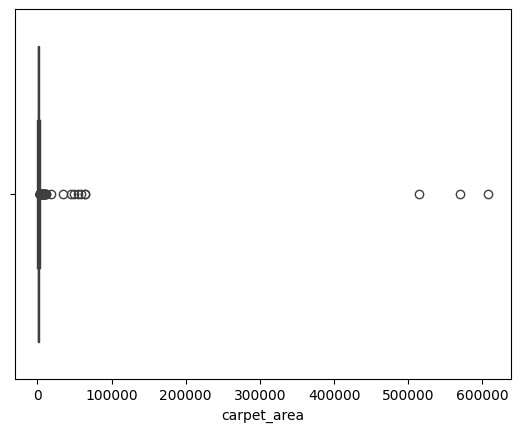

In [233]:
sns.boxplot(x=df["carpet_area"])

In [235]:
df.iloc[:, 16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,1,0,0,0,156.0
1,0,0,0,1,0,1,125.0
2,1,0,0,1,0,0,53.0
3,0,0,0,0,1,1,13.0
4,0,0,0,0,0,0,46.0
...,...,...,...,...,...,...,...
3676,0,1,0,0,0,2,NaN
3677,0,0,0,0,0,0,NaN
3678,0,0,0,0,0,0,NaN
3679,0,1,0,0,0,1,NaN


### Additional rooms

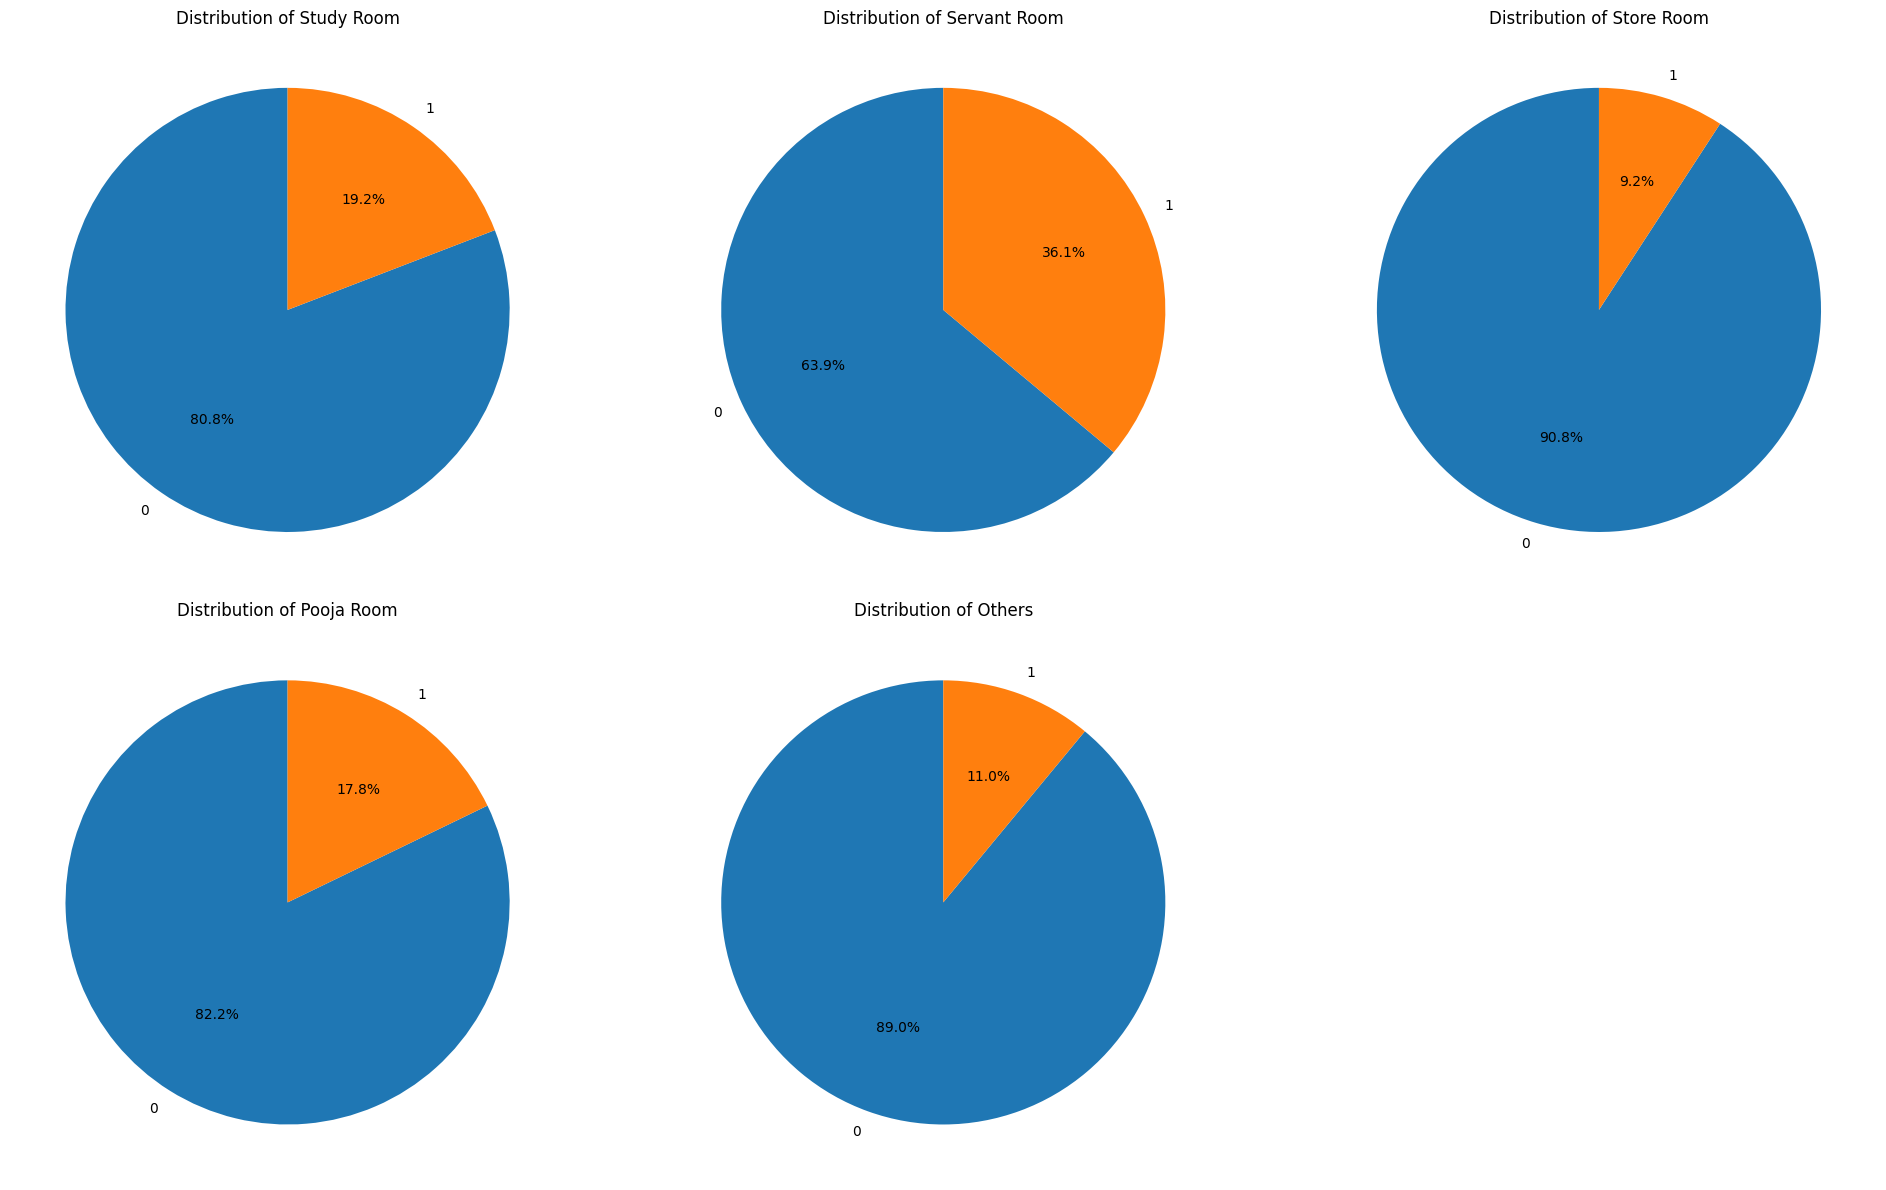

In [237]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

The distribution of the study room, servant room, store room, pooja room, and others have 19.5%, 36.1%, 9.2%, 17.8%, 11.0% respectively

### furnishing_type

In [238]:
df["furnishing_type"].value_counts()

furnishing_type
0    2440
1    1038
2     203
Name: count, dtype: int64

In [254]:
df["furnishing_type"].isnull().sum()

0

<Axes: ylabel='count'>

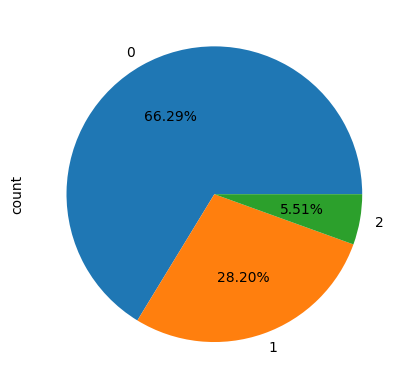

In [239]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

furnishing type is having 3 categories 0 -> unfurnished, 1 -> semi furnished, 2 -> furnished


0 -> unfurnished is holding 66.29% of the distribution
1 -> semifurnished is holding 28.20% of the distribution
2 -> furnished is holding 5.51% of the distribution

### luxury_score

In [241]:
df["luxury_score"].describe()

count    3566.000000
mean       71.401290
std        53.002254
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

In [242]:
df["luxury_score"].isnull().sum()

115

<Axes: xlabel='luxury_score', ylabel='Count'>

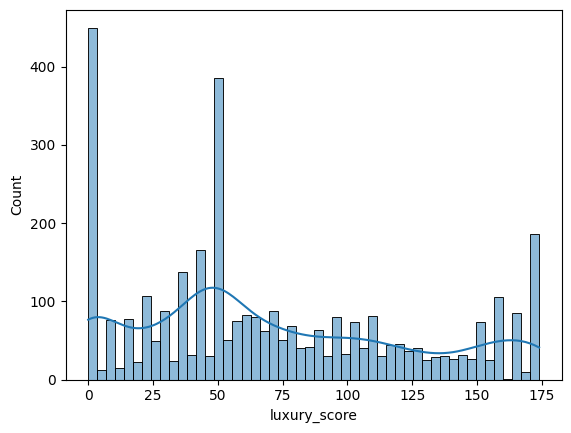

In [244]:
sns.histplot(df["luxury_score"], bins=50, kde=True)

<Axes: xlabel='luxury_score'>

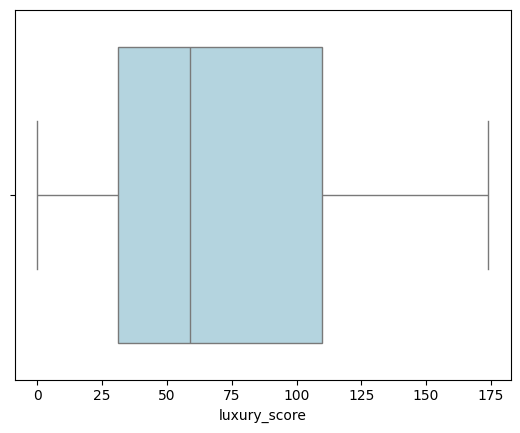

In [253]:
sns.boxplot(x=df["luxury_score"], color="lightblue")

In [ ]:
df["super_built_up_area"].describe()

count     1876.000000
mean      1924.557862
std        764.535501
min         89.000000
25%       1478.750000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.